
# Project: Investigate a Dataset (No-show appointments dataset)



## Introduction
The definition of the dataset from the given pdf:

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

In [88]:
# import the needed packages pandas, numpy,matplotlip and time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline 


    
## Data Wrangling

data are already gathered and need to be cleaned 

### General Properties

In [89]:
#load our data into dataframe

df=pd.read_csv(r'D:\Work\Udacity\data analysis\Projects\Project2  Investigate\noshowappointments-kagglev2-may-2016.csv')
#without r it generates an error. people on gooogle provided me with that solution
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [90]:
# to figure out the shape and size of data 

df.shape

(110527, 14)

In [91]:
#check for duplicates, use .sum to know the quantity
df.duplicated().sum()

0

There is no duplicate values

In [92]:
#See if the same patient booked more than 1 time

df['PatientId'].nunique()

62299

Nearly 50% of the patients are first time to deal with that center

In [93]:
#Check for missing values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are non_missing values  
‘AppointmentDay’ is an object type but we need to change it to datetime

In [94]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


how come the age is less than 0, so that will be removed in the cleaning process but first we need to know how many vaulues have this value

In [95]:
mask =df.query('Age =="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


it will not show which rows have this value, may be the center has pregnant section for unborn babies with ages <0, so I’ll not be dropping it

### Data Cleaning 
remove nan values or wrong entries

In [96]:
#Rename the column (No-show) to (No_show) because of error when using No-show word
df.rename(columns={'No-show':'No_show'},inplace=True)


In [97]:
#change the type of the column fom object to datetime
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

Cell type changed and No_show cell name was changed

In [98]:
#add column which show the difference between th booking and scheduled time 

df['time_booked']=df['ScheduledDay']- df['AppointmentDay']

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,time_booked
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days 18:38:08
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days 16:08:27
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days 16:19:04
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days 17:29:31
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days 16:07:23


In [99]:
#Remove unnecessary data, data that have no impact to no_show inspected object
#PatientId, AppointmentID,(ScheduledDay ,AppointmentDay) the drived colum is enough

df.drop(['PatientId','AppointmentID','ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)


In [100]:
#explore our new dataset
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,time_booked
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days 18:38:08
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days 16:08:27
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days 16:19:04
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days 17:29:31
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days 16:07:23


it dropped the colums so i could't re-run the cell

we are finished with the data cleaning and ready for analysis 

<a id='eda'></a>
## Exploratory Data Analysis
 


## First: figure the connections


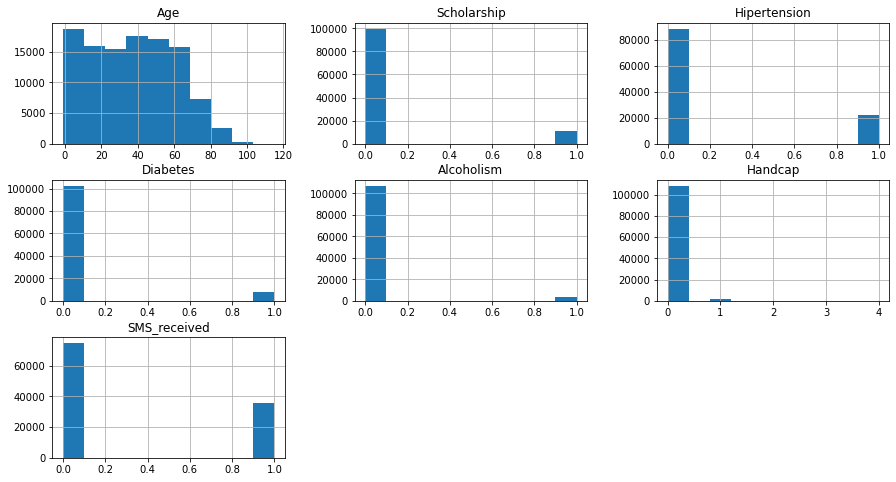

In [101]:
#visualize each column to see if it is relevant or not

df.hist(figsize=(15,8));

In [102]:
#We are investigating the number of people showed or no so 
#we will divide our dataset according to that (show,no_show)

show =df.No_show=="No" 
#the people who has no for no_show attribute are those who already showed 
no_show=df.No_show=='Yes'
#to separate the new column from the old one

In [103]:
df[show].count(), df[no_show].count()

(Gender           88208
 Age              88208
 Neighbourhood    88208
 Scholarship      88208
 Hipertension     88208
 Diabetes         88208
 Alcoholism       88208
 Handcap          88208
 SMS_received     88208
 No_show          88208
 time_booked      88208
 dtype: int64,
 Gender           22319
 Age              22319
 Neighbourhood    22319
 Scholarship      22319
 Hipertension     22319
 Diabetes         22319
 Alcoholism       22319
 Handcap          22319
 SMS_received     22319
 No_show          22319
 time_booked      22319
 dtype: int64)

In [104]:
df[show].mean(), df[no_show].mean()

C:\Users\TOSHIBA\AppData\Local\Temp/ipykernel_6672/3896216813.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[show].mean(), df[no_show].mean()


(Age                               37.790064
 Scholarship                        0.093903
 Hipertension                       0.204392
 Diabetes                           0.073837
 Alcoholism                         0.030417
 Handcap                            0.022742
 SMS_received                       0.291334
 time_booked     -9 days +17:03:13.775405859
 dtype: object,
 Age                                34.317667
 Scholarship                         0.115507
 Hipertension                        0.169004
 Diabetes                            0.064071
 Alcoholism                          0.030333
 Handcap                             0.020297
 SMS_received                        0.438371
 time_booked     -16 days +15:42:25.001120122
 dtype: object)

## what are the influencing factors on the show rate 
### 1- does age affect attenence?

Text(0, 0.5, 'Patient')

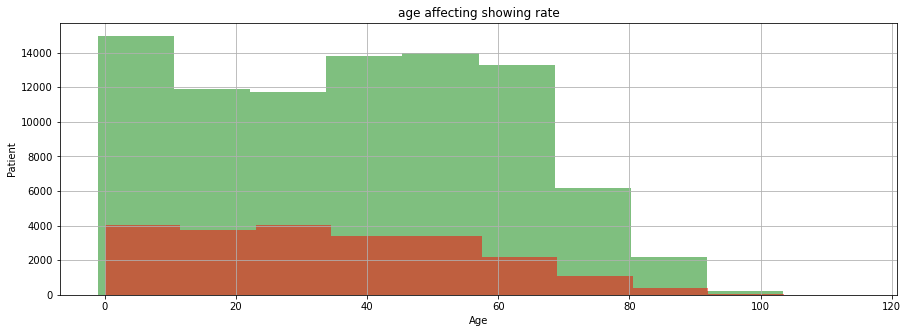

In [105]:
#investigate correlation between age and show rate
plt.figure(figsize= [15,5])
df.Age[show].hist(alpha=.5, color='green', label='show' )
df.Age[no_show].hist(alpha=.5, color='red', label='no_show') 
plt.legend
plt.title ('age affecting showing rate')
plt.xlabel('Age')
plt.ylabel ('Patient')

Small children are well taken care of, but older people are less to show

### 2- does the Gender affects the showing rate or not

Text(0, 0.5, 'Patient')

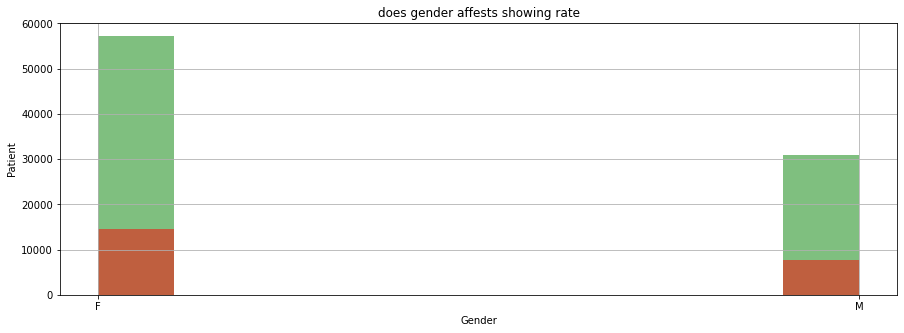

In [106]:
#different tpe of plot with function
plt.figure(figsize= [15,5])
df.Gender[show].hist(alpha=.5, color='green', label='show' )
df.Gender[no_show].hist(alpha=.5, color='red', label='no_show') 
plt.legend;
plt.title ('does gender affests showing rate')
plt.xlabel('Gender')
plt.ylabel ('Patient')





In [107]:
df.Gender[show].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

In [108]:
df.Gender[no_show].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

Despite the numbers of females is higher but the percentage of showing is the same it in not affected by gender 

### 3- -does the diseases affect showing rate

- Hipertension

Text(0, 0.5, 'Patient')

C:\Users\TOSHIBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TOSHIBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


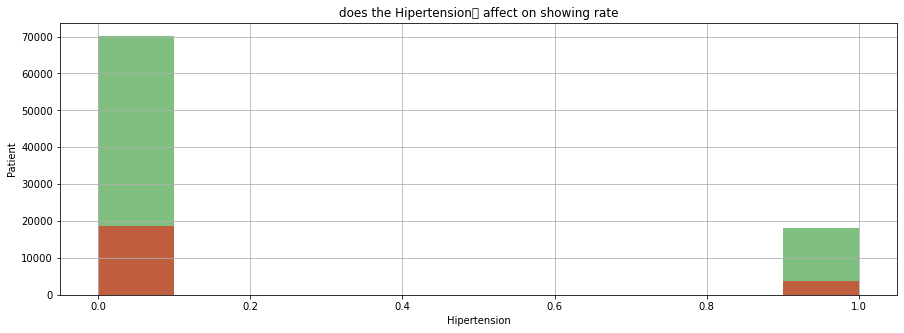

In [109]:
plt.figure(figsize= [15,5])
df.Hipertension[show].hist(alpha=.5, color='green', label='show' )
df.Hipertension[no_show].hist(alpha=.5, color='red', label='no_show') 
plt.legend;
plt.title ('does the Hipertension	 affect on showing rate')
plt.xlabel('Hipertension')
plt.ylabel ('Patient')

no afffect on the showing rate

- does the Diabetes affect on showing rate

Text(0, 0.5, 'Patient')

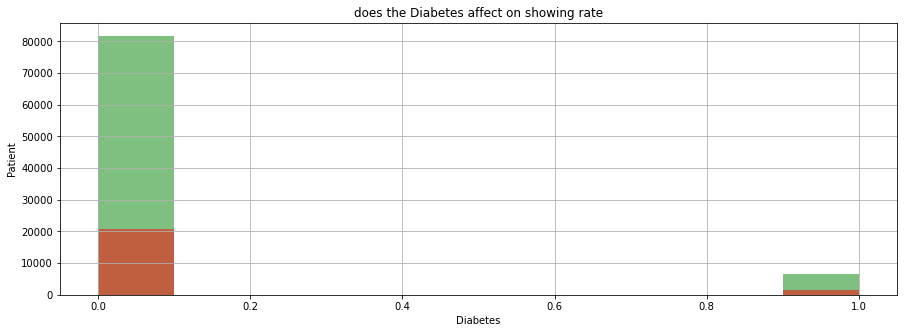

In [110]:
plt.figure(figsize= [15,5])
df.Diabetes[show].hist(alpha=.5, color='green', label='show' )
df.Diabetes[no_show].hist(alpha=.5, color='red', label='no_show') 
plt.legend;
plt.title ('does the Diabetes affect on showing rate')
plt.xlabel('Diabetes')
plt.ylabel ('Patient')

no afffect on the showing rate

-does the Alcoholism affect on showing rate

Text(0, 0.5, 'Patient')

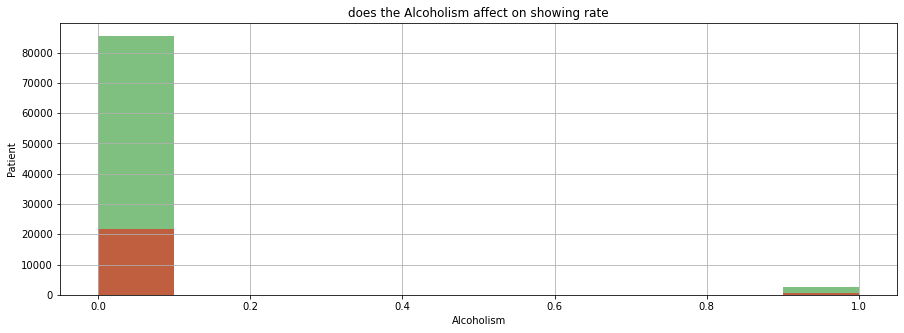

In [111]:
plt.figure(figsize= [15,5])
df.Alcoholism[show].hist(alpha=.5, color='green', label='show' )
df.Alcoholism[no_show].hist(alpha=.5, color='red', label='no_show') 
plt.legend;
plt.title ('does the Alcoholism affect on showing rate')
plt.xlabel('Alcoholism')
plt.ylabel ('Patient')

no afffect on the showing rate

-does the Handcap affect on showing rate

Text(0, 0.5, 'Patient')

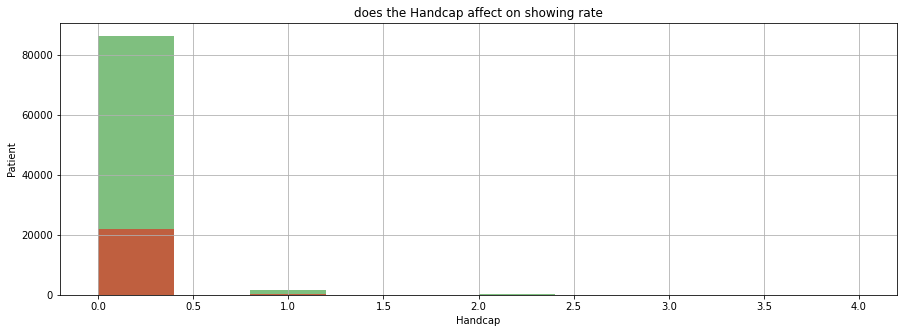

In [112]:
plt.figure(figsize= [15,5])
df.Handcap[show].hist(alpha=.5, color='green', label='show' )
df.Handcap[no_show].hist(alpha=.5, color='red', label='no_show') 
plt.legend;
plt.title ('does the Handcap affect on showing rate')
plt.xlabel('Handcap')
plt.ylabel ('Patient')

no afffect on the showing rate

### 4- does the Scholarship affect on showing rate

Text(0, 0.5, 'Patient')

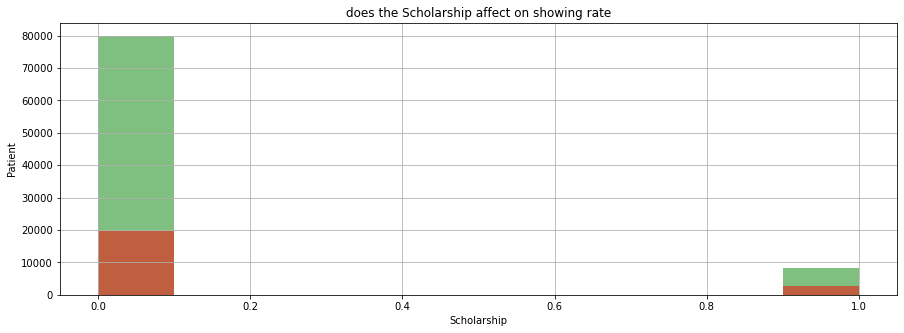

In [113]:
plt.figure(figsize= [15,5])
df.Scholarship[show].hist(alpha=.5, color='green', label='show' )
df.Scholarship[no_show].hist(alpha=.5, color='red', label='no_show') 
plt.legend;
plt.title ('does the Scholarship affect on showing rate')
plt.xlabel('Scholarship')
plt.ylabel ('Patient')

no efffect on the showing rate

### 5- does receiving an sms affects showing rate'

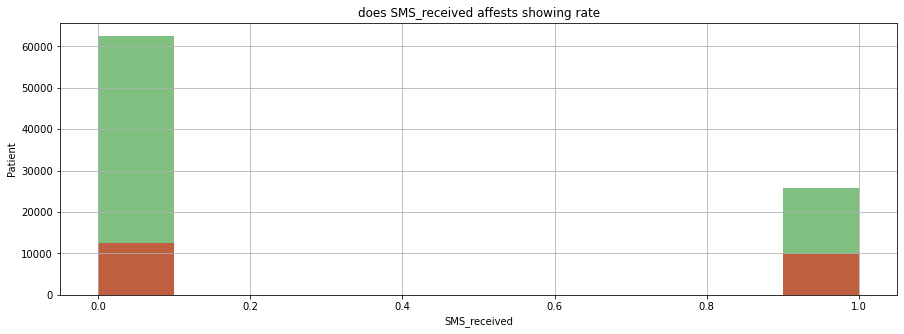

In [114]:
def attendence (df, col_name,attended,absent):
    plt.figure(figsize= [15,5])
    df[col_name][show].hist(alpha=0.5, color ='green', label='show')
    df[col_name][no_show].hist(alpha=0.5, color ='red', label='no_show')
    plt.legend;
    plt.title ('does SMS_received affests showing rate')
    plt.xlabel('SMS_received')
    plt.ylabel ('Patient')
attendence(df,'SMS_received',show, no_show)


People that didn’t show and received an SMS has a high percentage, so the SMS system need to be rechecked 

### 6- does the time_booked affects showing rate

In [115]:
# transform tine_booked to int or object to be able to compare

df['time_booked[']=pd.astype(float)
df.head()

AttributeError: module 'pandas' has no attribute 'astype'

it will not change the type ro be able to compare between the booking day and the showing rate 

In [116]:
'''plt.figure(figsize= [15,5])
df.time_booked[show].hist(alpha=.5, color='green', label='show' )
df.time_booked[no_show].hist(alpha=.5, color='red', label='no_show') 
plt.legend;
plt.title ('does the time_booked affects showing rate')
plt.xlabel('time_booked')
plt.ylabel ('Patient')'''

"plt.figure(figsize= [15,5])\ndf.time_booked[show].hist(alpha=.5, color='green', label='show' )\ndf.time_booked[no_show].hist(alpha=.5, color='red', label='no_show') \nplt.legend;\nplt.title ('does the time_booked affects showing rate')\nplt.xlabel('time_booked')\nplt.ylabel ('Patient')"

will not show the relatio between time and an object

### 7- does the neighborhood affects showing rate

Text(0, 0.5, 'Patient')

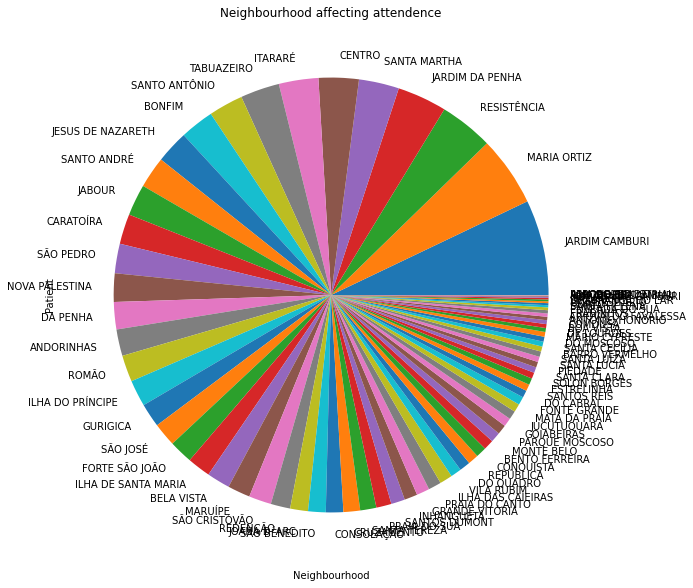

In [117]:
#See the effect of the neighborhood on the showing rate

plt.figure(figsize= [20,10])
df['Neighbourhood'][show].value_counts(normalize=True).plot(kind='pie',label='show')

#df.Neighbourhood[show].hist(alpha=.5, color='green', label='show' )1
#df.Neighbourhood[no_show].hist(alpha=.5, color='red', label='no_show') 
plt.legend
plt.title ('Neighbourhood affecting attendence')
plt.xlabel('Neighbourhood')
plt.ylabel ('Patient')


specific neighborhoods have more patients than others but we do’t have more informations to determine why

Text(0, 0.5, 'Patient')

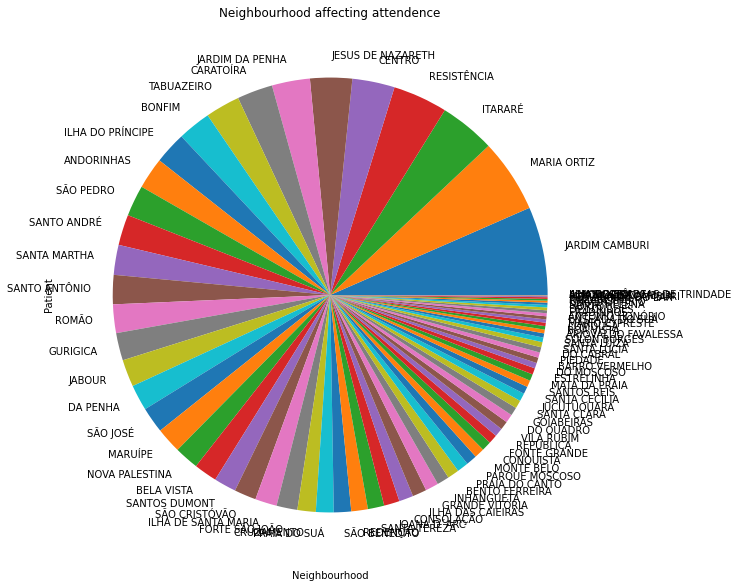

In [118]:
plt.figure(figsize= [20,10])
df['Neighbourhood'][no_show].value_counts(normalize=True).plot(kind='pie',label='no_show')
 
plt.legend
plt.title ('Neighbourhood affecting attendence')
plt.xlabel('Neighbourhood')
plt.ylabel ('Patient')

the pie chart is more obvious at showing this correlation 

## limitation
1. There is no data enough ti determine the relation between the neighborhood and showing rate
2. I couldn’t set the relation between time waited to the examination 

<a id='conclusions'></a>
## Conclusions



Didn’t be able to find correlation between the showing rate and any of the given factors, but certain elements need to focus on:
- SMS system need to rechecked
- age if people booking is relatively determine the showing rate but no one can control the age,  or provide more facilities for them 
- neighborhood take part in showing rate but there is no enough data to review the relation
